<a href="https://colab.research.google.com/github/nabinyd/60-Days-of-learning/blob/main/DLPT_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 04

## **Pytorch Workflow**

In [ ]:
what_were_covering = {
    1:  "data (prepare and load)",
    2:  "build model",
    3:  "fitting the model to data (training)",
    4:  "making predictions and evaluating a model (inference)",
    5:  "saving and loading a model",
    6:  "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.3.0+cu121'

###  1. **Data (preparing and loading)**

Data can be almost anything... in machine learning.


  *  Excel spreadsheet
  *  Images of any kind
  *  Videos (Youtube has lots of data)
  *  Audio like songs or podcasts
  *  DNA
  *  Text

###**Linear regression**

Machine learning is a game of two parts:

1. Get data into numerical representations
2. Build a model to learn patterns in that numerical representation.


To showcase this let's create some *known* data using liner regression formula

We will use a linear regression formula to make a straight line with known **Parameters**.


In [ ]:
# create known paramenters

weight = 0.7
bias =  0.3

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

Y= weight * X + bias

X[:10],  Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

 #### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

 Let's create a training and test set with our data.

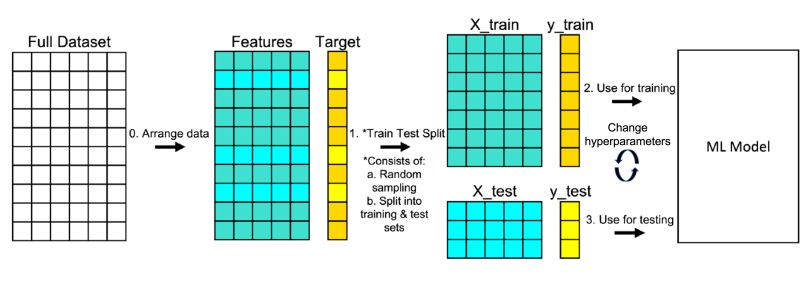

In [ ]:
len(X), len(Y)

(50, 50)

In [ ]:
# Create a train/ test split
train_split = int(0.8 * len(X))
print(train_split)


40


In [ ]:
x_train, y_train = X[:train_split], Y[:train_split]
#x_train, y_train
x_test,y_test = X[train_split:], Y[train_split:]
#x_test, y_test

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(
    train_data = x_train,
    train_labels = y_train,
    test_data = x_test,
    test_label = y_test,
    predictions= None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s= 4, label =" Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_label, c= "g", s= 4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data,predictions, c="r", s= 4, label = "Predictions")


  # Show the legend
  plt.legend(prop={"size":14});




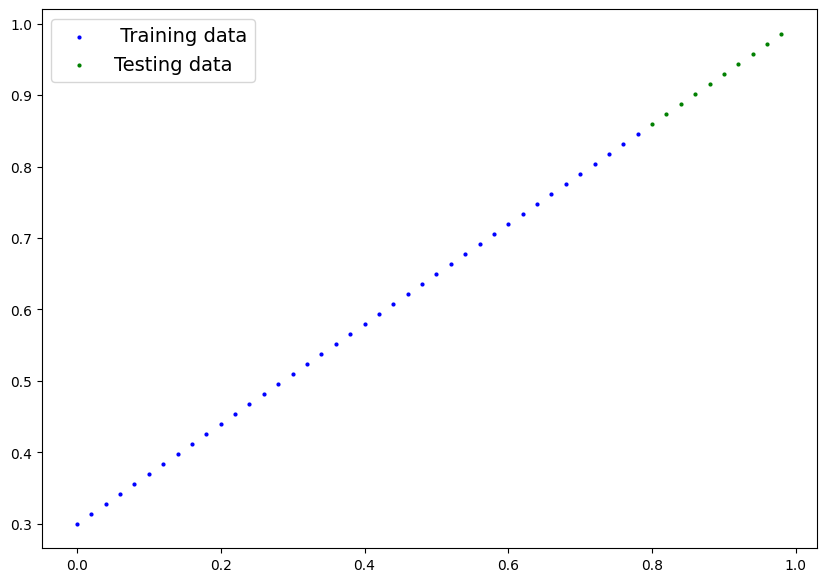

In [ ]:
plot_predictions()